## Logitstic Regression with SkLearn

In [1]:
# data preprocessing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# breast cancer from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2
# https://bookdown.org/tpinto_home/Regression-and-Classification/logistic-regression.html
dataset = pd.read_csv('data_1.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
# fit a Logistic Regression
X = dataset.iloc[:, 2:4] # using just two feature
y = dataset.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

<AxesSubplot:>

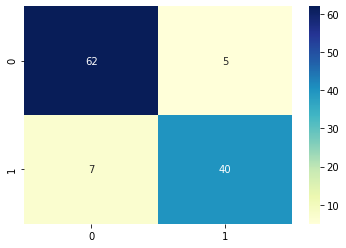

In [6]:
y_pred = LR_model.predict(X_test)
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g') # g, d
# YlGnBu, Blues, BuPu, Greens, PiYG

In [8]:
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), decimals=2))

Accuracy: 0.89


In [10]:
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
# print('Precision:', metrics.precision_score(y_test, y_pred, pos_label='B'))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred, pos_label='B'), decimals=2))

Precision: 0.9


In [11]:
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
# print('Recall:', metrics.recall_score(y_test, y_pred, pos_label='B'))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred, pos_label='B'), decimals=2))

Precision: 0.9
